# Ejercicio Práctico de Koalas

In [50]:
import findspark
findspark.init()

import pandas as pd
import pyspark

import numpy as np
import pyspark.pandas as ps
import databricks.koalas as ks

### Funciones básicas

In [51]:
pser = pd.Series([1, 3, 5, np.nan, 6, 8]) 

## Crea una serie de Koalas con [1, 3, 5, np.nan, 6, 8]

kser = ps.Series(pser)

## Pasa la serie de pandas pser a Koalas con el nombre de kser

In [52]:
## Ordena kser por el index
kser.sort_index(ascending=False)

5    8.0
4    6.0
3    NaN
2    5.0
1    3.0
0    1.0
dtype: float64

In [53]:
pdf = pd.DataFrame({'A': np.random.rand(5),
                    'B': np.random.rand(5)})

## Genera un Dataframe de Koalas con el pdf de pandas y llamalo kdf
kdf = ps.from_pandas(pdf)

In [54]:
type(kdf)

pyspark.pandas.frame.DataFrame

### Visualización de datos

In [55]:
## Describe los datos de kdf
kdf.to_spark().show() 

c:\Users\heyde\.conda\envs\EYDER\lib\site-packages\pyspark\pandas\utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


+-------------------+-------------------+
|                  A|                  B|
+-------------------+-------------------+
| 0.6876033880834652| 0.2272424197160553|
| 0.7200558998296958|  0.926429429564052|
| 0.8792167381463512|0.14309993729030712|
| 0.8553164730658833| 0.1751072731208806|
|0.08736606183204432| 0.9597833813164902|
+-------------------+-------------------+



In [56]:
## Ordena los datos de kdf por la columna B
kdf.sort_values(by='B')

,A,B
2,0.879217,0.143100
3,0.855316,0.175107
0,0.687603,0.227242
1,0.720056,0.926429
4,0.087366,0.959783


In [57]:
## Transpon los datos de kdf
kdf.T

,0,1,2,3,4
A,0.687603,0.720056,0.879217,0.855316,0.087366
B,0.227242,0.926429,0.143100,0.175107,0.959783


### Selección

In [58]:
kdf

,A,B
0,0.687603,0.227242
1,0.720056,0.926429
2,0.879217,0.143100
3,0.855316,0.175107
4,0.087366,0.959783


In [59]:
## Selecciona las varaibles A y B de Kdf
kdf[['A']]

,A
0,0.687603
1,0.720056
2,0.879217
3,0.855316
4,0.087366


In [60]:
kdf[['B']]

,B
0,0.227242
1,0.926429
2,0.143100
3,0.175107
4,0.959783


In [61]:
## Selecciona las filas 1, 2 de kdf
kdf.iloc[1:3]

,A,B
1,0.720056,0.926429
2,0.879217,0.143100


In [62]:
## Selecciona las filas 0, 1 y 2 de la variable B
kdf[['B']].loc[0:2]

,B
0,0.227242
1,0.926429
2,0.143100


### Aplicando funciones de Python a Koalas

In [63]:
## Aplica la funcion de Python de np.cumsum a kdf
kdf.cumsum()['A']

0    0.687603
1    1.407659
2    2.286876
3    3.142192
4    3.229559
Name: A, dtype: float64

In [64]:
## Eleva al cuadrado los valores de kdf
kdf*kdf

,A,B
0,0.472798,0.051639
1,0.518480,0.858271
2,0.773022,0.020478
3,0.731566,0.030663
4,0.007633,0.921184


### Agrupando datos

In [65]:
## Obten la suma de los valores al agrupar por A y por B
kdf.groupby(['A','B']).sum()

,
A,B
0.687603,0.227242
0.720056,0.926429
0.879217,0.143100
0.855316,0.175107
0.087366,0.959783


### Generando gráficos

In [66]:
# This is needed for visualizing plot on notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant', 'rabbit', 'giraffe', 'coyote', 'horse']
#padf = pd.DataFrame({'speed': speed, 'lifespan': lifespan}, index=index)
kdf = ps.DataFrame({'speed':speed,'lifespan':lifespan},index=index)

In [68]:
kdf

,speed,lifespan
snail,0.1,2.0
pig,17.5,8.0
elephant,40.0,70.0
rabbit,48.0,1.5
giraffe,52.0,25.0
coyote,69.0,12.0
horse,88.0,28.0


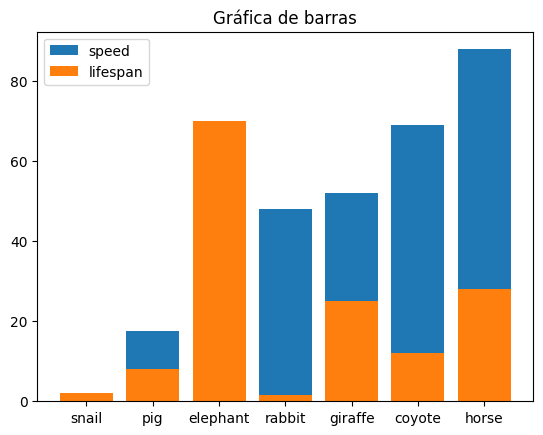

In [69]:
## Genera un grafico de barras con kdf y matplotlib
plt.title('Gráfica de barras')
plt.bar(index,speed,label='speed')
plt.bar(index,lifespan,label='lifespan')
plt.legend(loc='best')
plt.show()

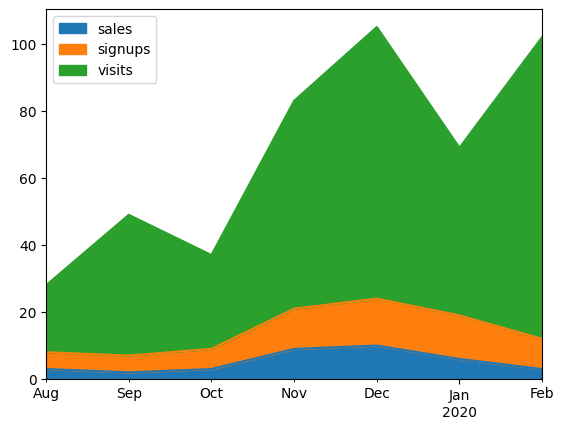

In [81]:
kdf = pd.DataFrame({
    'sales': [3, 2, 3, 9, 10, 6, 3],
    'signups': [5, 5, 6, 12, 14, 13, 9],
    'visits': [20, 42, 28, 62, 81, 50, 90],
}, index=pd.date_range(start='2019/08/15', end='2020/03/09', freq='M'))

## Genera un grafico de areas con kdf y matplotlib
ax = kdf.plot.area()


In [73]:
kdf.to_spark().show() 

c:\Users\heyde\.conda\envs\EYDER\lib\site-packages\pyspark\pandas\utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


+-----+-------+------+
|sales|signups|visits|
+-----+-------+------+
|    3|      5|    20|
|    2|      5|    42|
|    3|      6|    28|
|    9|     12|    62|
|   10|     14|    81|
|    6|     13|    50|
|    3|      9|    90|
+-----+-------+------+



### Utilizando SQL en Koalas

In [83]:
kdf = ps.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'pig': [20, 18, 489, 675, 1776],
                    'horse': [4, 25, 281, 600, 1900]})

In [86]:
kdf.to_spark().show() 

c:\Users\heyde\.conda\envs\EYDER\lib\site-packages\pyspark\pandas\utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


+----+----+-----+
|year| pig|horse|
+----+----+-----+
|1990|  20|    4|
|1997|  18|   25|
|2003| 489|  281|
|2009| 675|  600|
|2014|1776| 1900|
+----+----+-----+



In [ ]:
## Con una consulta SQL selecciona los datos donde pig sea mayor que 100


In [84]:
pdf = pd.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'sheep': [22, 50, 121, 445, 791],
                    'chicken': [250, 326, 589, 1241, 2118]})

In [ ]:
## Haz un inner join entre kdf y pdf en la vriable year, selecciona el pig y el chicken
## ordena los datos por pig y chicken


### Trabajando con PySpark

In [89]:
kdf = ps.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]})

## Convierete el dataframe de Koalas a Dataframe de Spark
sdf = kdf.to_spark()
type(sdf)

c:\Users\heyde\.conda\envs\EYDER\lib\site-packages\pyspark\pandas\utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


pyspark.sql.dataframe.DataFrame

In [91]:
## muestra los datos
sdf.show()

+---+---+
|  A|  B|
+---+---+
|  1| 10|
|  2| 20|
|  3| 30|
|  4| 40|
|  5| 50|
+---+---+

